# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.





# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



In [106]:
# Import all the required libraries 
import numpy as np
import pandas as pd
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer



# Basic EDA on cnbc_headlines dataset

In [107]:
# Read csv file of cnbc headlines using pandas
cnbc_headlines = pd.read_csv("cnbc_headlines.csv")

In [108]:
cnbc_headlines

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [109]:
# check the shape of cnbc headline dataset
cnbc_headlines.shape

(3080, 3)

In [110]:
# Check all the columns in the cnbc headline dataset
cnbc_headlines.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [111]:
# Check which columns are having categorical, numerical or boolean values
cnbc_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [112]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc_headlines.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [113]:
 # drop nan values in cnbc headline dataset
cnbc_headlines = cnbc_headlines.dropna()

In [114]:
cnbc_headlines.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [115]:
# drop the duplicate rows in the dataset keep the first one
cnbc_headlines = cnbc_headlines.drop_duplicates(subset=['Headlines','Description'], keep= 'first')
cnbc_headlines.reset_index(drop = True, inplace=True)
cnbc_headlines

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2785,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2786,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2787,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2788,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [116]:
# check the shape of cnbc headline dataset
cnbc_headlines.shape

(2790, 3)

# Basic EDA on Gaurdian headlines dataset

In [117]:
# Read csv file of gaurdian headlines using pandas
guardian_headlines = pd.read_csv('guardian_headlines.csv')

In [118]:
guardian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [119]:
#check the shape of gaurdian headline dataset
guardian_headlines.shape

(17800, 2)

In [120]:
#check columns of gaurdian headline
guardian_headlines.columns

Index(['Time', 'Headlines'], dtype='object')

In [121]:
# Check which columns are having categorical, numerical or boolean values
guardian_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [122]:
# check null values in gaurdian headlines dataset
guardian_headlines.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [123]:
# drop duplicate rows in headlines and keep the first one
guardian_headlines = guardian_headlines.drop_duplicates(subset=['Headlines'],keep='first')
guardian_headlines.reset_index(drop=True, inplace=True)
guardian_headlines

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17790,17-Dec-17,How investing in solar energy can create a bri...
17791,17-Dec-17,Poundland suppliers hit by insurance downgrade
17792,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17793,17-Dec-17,Unilever sells household name spreads to KKR f...


In [124]:
guardian_headlines.shape

(17795, 2)

# Basic EDA on reuters headlines

In [125]:
# Read csv file of reuters headlines using using pandas
reuters_headlines = pd.read_csv('reuters_headlines.csv')

In [126]:
reuters_headlines.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [127]:
#check the shape of reuters headlines dataset
reuters_headlines.shape

(32770, 3)

In [128]:
#check the columns of reuters headline dataset
reuters_headlines.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [129]:
# Check which columns are having categorical, numerical or boolean values
reuters_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [130]:
# Check for missing values in all the columnns of reuters headlines dataset
reuters_headlines.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [131]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuters_headlines = reuters_headlines.drop_duplicates(subset=['Headlines','Description'], keep='first')
reuters_headlines.reset_index(drop=True, inplace = True)
reuters_headlines

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [132]:
reuters_headlines.shape

(32673, 3)

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.



In [133]:
# create a function for preprocessing 
def preprocessing_text(text):
  #convert all to lowercase
    text = text.lower()

  #remove puntuations
    text = text.translate(str.maketrans("","", string.punctuation))

  #remove stopword
    stopword = set(stopwords.words("english"))
    text_tokens = word_tokenize(text)
    filtered_words = [word for word in text_tokens if word not in stopword]

  #stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in filtered_words ]

  #lemmitizing
 
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word,pos='a') for word in stemmed_words]

    return " ".join(lemma_words)

SENTIMENT ANAYSIS

In [134]:
# import sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# create sentiment intensity analyzer object
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Muskan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [135]:
#fuction to  decide sentiment as positive, negative and neutral
def get_analysis(score):
    if score < 0.0:
        return 'Negative'
    elif score == 0.0:
        return 'Neutral'
    else:
        return 'Positive'

# Now working with description on datasets

In [136]:
# concatenate cnbc headlines dataset and reuters headline dataset
new_data = pd.concat([cnbc_headlines, reuters_headlines], axis=0)

In [137]:
#check the shape of this new dataset
new_data.shape

(35463, 3)

In [138]:
#make a copy of new dataset 
new_data_copy = new_data.copy()

In [139]:
new_data.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [140]:
# apply preprocessing to the description of new dataset

new_data['Description'] = new_data['Description'].apply(preprocessing_text)
new_data.head(20)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...
5,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020",mad money host jim cramer ring lightn round be...
6,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020",invest 5 per day compound 70000 time child rea...
7,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",hundr compani cut suspend dividend far year se...
8,StockX has authenticated 1 million Jordan snea...,"8:25 PM ET Wed, 15 July 2020",weve abl captur cultur moment like espn releas...
9,Biohaven Pharmaceuticals lands Khloe Kardashia...,"7:51 PM ET Wed, 15 July 2020",biohaven ceo vlad coric said compani brought k...


In [141]:
# analyze polarity score of values in description and  add new column of it in dataset
ds_score= []
for value in new_data['Description'].values:
    ds_score.append(analyzer.polarity_scores(value)['compound'])
    
new_data['ds_score'] = ds_score
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818


In [142]:
# apply the function  which decides sentiment to  polarity score column
new_data['ds_score'] = new_data['ds_score'].apply(get_analysis)
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


<AxesSubplot:xlabel='ds_score', ylabel='count'>

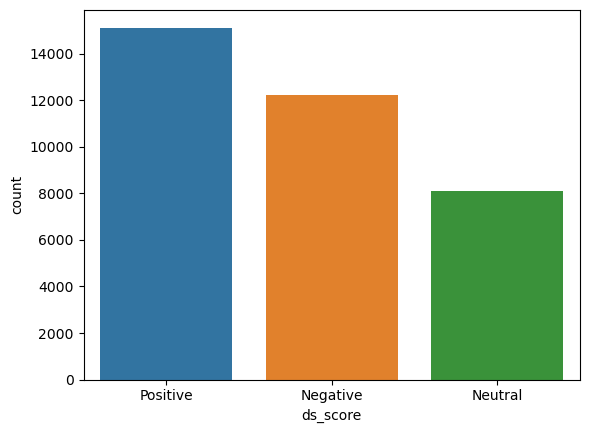

In [143]:
# plot a count plot on description score column
sns.countplot(x = 'ds_score', data = new_data)

In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

Text(0.5, 1.0, 'Pie Chart of different sentiments')

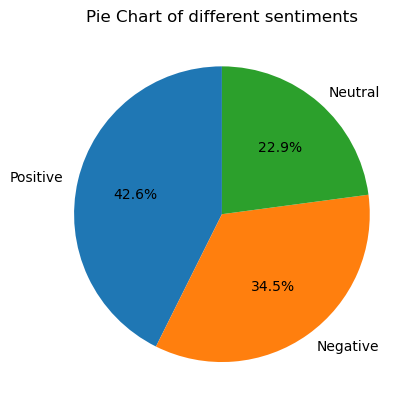

In [144]:
# pie chart on description score column
plt.pie(x = new_data['ds_score'].value_counts() , labels=new_data['ds_score'].value_counts().index , startangle=90,
        autopct='%1.1f%%')
plt.title('Pie Chart of different sentiments')

In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X = new_data['Description']
y= new_data['ds_score']

In [147]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [148]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [149]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                ('model',LinearSVC())])


# Fit the pipeline to the data
linear_svc_model = pipe.fit(X_train, y_train)
# predict on test dataset
prediction = linear_svc_model.predict(X_test)

print("Model = Linear SVC")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model = Linear SVC
accuracy score is 93.43 %
[[1122   48   54]
 [  26  771   19]
 [  53   33 1421]]
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    Positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

Wall time: 1.39 s


LOGISTIC REGRESSION


In [150]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', LogisticRegression())])

# fit the pipeline to the train data
log_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = log_model.predict(X_test)

print("Model - Logistic Regression")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - Logistic Regression
accuracy score is 89.46 %
[[1047   93   84]
 [  44  740   32]
 [  69   52 1386]]
              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    Positive       0.92      0.92      0.92      1507

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547

Wall time: 4.19 s


C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MULTINOMIAL NAIVE BAYES


In [151]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', MultinomialNB())])

# fit the pipeline to the train data
multinomialNB_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = multinomialNB_model.predict(X_test)

print("Model - Multinomial Naive Bayes")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - Multinomial Naive Bayes
accuracy score is 62.31 %
[[ 729    8  487]
 [ 155   98  563]
 [ 117    7 1383]]
              precision    recall  f1-score   support

    Negative       0.73      0.60      0.66      1224
     Neutral       0.87      0.12      0.21       816
    Positive       0.57      0.92      0.70      1507

    accuracy                           0.62      3547
   macro avg       0.72      0.54      0.52      3547
weighted avg       0.69      0.62      0.57      3547

Wall time: 893 ms


BERNOULLI NAIVE BAYES


In [152]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', BernoulliNB())])

# fit the pipeline to the train data
BernoulliNB_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = BernoulliNB_model.predict(X_test)

print("Model - Bernoulli Naive Bayes ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - Bernoulli Naive Bayes 
accuracy score is 73.61 %
[[ 879   70  275]
 [ 127  496  193]
 [ 198   73 1236]]
              precision    recall  f1-score   support

    Negative       0.73      0.72      0.72      1224
     Neutral       0.78      0.61      0.68       816
    Positive       0.73      0.82      0.77      1507

    accuracy                           0.74      3547
   macro avg       0.74      0.72      0.73      3547
weighted avg       0.74      0.74      0.73      3547

Wall time: 933 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [153]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', GradientBoostingClassifier(loss='deviance',
                                                    learning_rate=0.01,
                                                    n_estimators=10,
                                                    max_depth=5,
                                                    random_state=55))])

# fit the pipeline to the train data
GB_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = GB_model.predict(X_test)

print("Model - GRADIENT BOOSTING CLASSIFICATION ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - GRADIENT BOOSTING CLASSIFICATION 
accuracy score is 42.68 %
[[   9    0 1215]
 [   0    0  816]
 [   2    0 1505]]
              precision    recall  f1-score   support

    Negative       0.82      0.01      0.01      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.43      1.00      0.60      1507

    accuracy                           0.43      3547
   macro avg       0.41      0.34      0.20      3547
weighted avg       0.46      0.43      0.26      3547

Wall time: 10.7 s


C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBOOST CLASSIFICATION MODEL


In [154]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

from sklearn.preprocessing import LabelEncoder
# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels in your target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', XGBClassifier())])

# fit the pipeline to the train data
XGB_model = pipe.fit(X_train,y_train_encoded)

# predict on test dataset
prediction = XGB_model.predict(X_test)

print("Model - XGBOOST CLASSIFICATION CLASSIFICATION ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test_encoded,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test_encoded,prediction))
#print classification report
print(classification_report(y_test_encoded,prediction))

Model - XGBOOST CLASSIFICATION CLASSIFICATION 
accuracy score is 89.57 %
[[1016  126   82]
 [   7  796   13]
 [  64   78 1365]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1224
           1       0.80      0.98      0.88       816
           2       0.93      0.91      0.92      1507

    accuracy                           0.90      3547
   macro avg       0.89      0.90      0.89      3547
weighted avg       0.90      0.90      0.90      3547

Wall time: 36.5 s


DECISION TREE CLASSIFICATION MODEL


In [155]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', DecisionTreeClassifier())])

# fit the pipeline to the train data
Decision_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = Decision_model.predict(X_test)

print("Model - Decision Tree ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - Decision Tree 
accuracy score is 86.89 %
[[1008   21  195]
 [  11  792   13]
 [ 213   12 1282]]
              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82      1224
     Neutral       0.96      0.97      0.97       816
    Positive       0.86      0.85      0.86      1507

    accuracy                           0.87      3547
   macro avg       0.88      0.88      0.88      3547
weighted avg       0.87      0.87      0.87      3547

Wall time: 19.8 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [156]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', KNeighborsClassifier(n_neighbors=10,
                                                    weights='distance'))])

# fit the pipeline to the train data
KNN_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = KNN_model.predict(X_test)

print("Model - K- NEAREST NEIGHBOUR  ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - K- NEAREST NEIGHBOUR  
accuracy score is 57.26 %
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
    Positive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

Wall time: 5.17 s


In [157]:
# helper function for comparing models matric
def compare_models(models, names, X_train, y_train,X_test, y_test):
    
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split

    # create a dataframe with column matric and metric name as value
    for(model,name) in zip(models,names):
        print(name)
        y_pred = model.predict(X_test)
    # then predict on the test set
        res = classification_report(y_test,y_pred)
        print("classification report \n", res)
        print("-------------------------------------------------------------------------------------------")

In [158]:
# list of model objects
models = [linear_svc_model, log_model, multinomialNB_model, BernoulliNB_model, GB_model, 
          Decision_model, KNN_model]
# list of model names
names = ['linearSVC','logistic','MultinomialNB','BernoulliNB','gardientboost','decisiontree','KNN']
# print the comparison of models
compare_models(models, names, X_train,y_train,X_test,y_test)

linearSVC
classification report 
               precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    Positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

-------------------------------------------------------------------------------------------
logistic
classification report 
               precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    Positive       0.92      0.92      0.92      1507

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547

-------------------------------------------------------------------------------

C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report 
               precision    recall  f1-score   support

    Negative       0.82      0.82      0.82      1224
     Neutral       0.96      0.97      0.97       816
    Positive       0.86      0.85      0.86      1507

    accuracy                           0.87      3547
   macro avg       0.88      0.88      0.88      3547
weighted avg       0.87      0.87      0.87      3547

-------------------------------------------------------------------------------------------
KNN
classification report 
               precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
    Positive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

-------------------------------------------------------------------------------------------


# working with test dataset

In [159]:
# Perforn the prediction on the test dataset
y_predicted = linear_svc_model.predict(X_test)

In [160]:
y_predicted

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Neutral'], dtype=object)

In [161]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)

In [162]:
predictions

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive
...,...
3542,Negative
3543,Positive
3544,Negative
3545,Positive


# Now working with headlines + description

In [163]:
new_data.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative


In [164]:
# merge headlines and description of new dataset and name it info
new_data['info'] =  new_data['Headlines'] + new_data['Description']
new_data.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative,Wall Street delivered the 'kind of pullback I'...


In [165]:
# only keep info and time column . drop all remaining columns
new_data =  new_data.drop(columns=['Headlines','Description','ds_score'])
new_data.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [166]:
# apply preprocessing on info column
new_data['info'] = new_data['info'].apply(preprocessing_text)
new_data

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...
...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...


In [167]:
# analyze polarity score of values in info and  add new column of it in dataset
info_score = []

for value in new_data['info'].values:
    info_score.append(analyzer.polarity_scores(value)['compound'])
    
new_data['info_score'] = info_score

In [168]:
# apply the function  which decides sentiment to  polarity score column
new_data['info_score'] = new_data['info_score'].apply(get_analysis)
new_data

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


<AxesSubplot:xlabel='info_score', ylabel='count'>

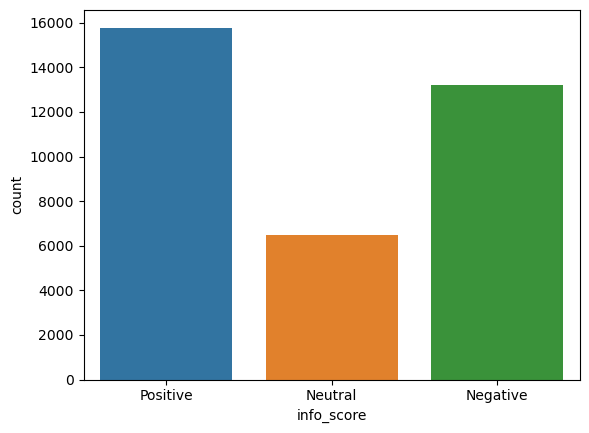

In [169]:
# perform count plot on info_score column
sns.countplot(data = new_data, x = "info_score")

In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

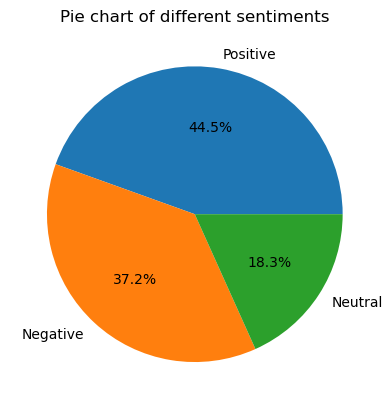

In [170]:
# perform pie chart on info_score column
plt.pie(x = new_data['info_score'].value_counts(), labels=new_data['info_score'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie chart of different sentiments')
plt.show()

In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [171]:
X = new_data['info']
y = new_data['info_score']

In [172]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [173]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                ('model',LinearSVC())])

# Fit the pipline to the data
linear_svc_model =  pipe.fit(X_train, y_train)
#predict on test dataset
prediction = linear_svc_model.predict(X_test)
print('Model - linear SVC')
#print accuracy
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - linear SVC
accuracy score is 90.7 %
[[1183   57   83]
 [  45  565   48]
 [  55   42 1469]]
              precision    recall  f1-score   support

    Negative       0.92      0.89      0.91      1323
     Neutral       0.85      0.86      0.85       658
    Positive       0.92      0.94      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

Wall time: 1.48 s


LOGISTIC REGRESSION


In [174]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', LogisticRegression())])

# fit the pipeline to the train data
log_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = log_model.predict(X_test)

print("Model - Logistic Regression")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - Logistic Regression
accuracy score is 86.86 %
[[1139   68  116]
 [  81  495   82]
 [  80   39 1447]]
              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      1323
     Neutral       0.82      0.75      0.79       658
    Positive       0.88      0.92      0.90      1566

    accuracy                           0.87      3547
   macro avg       0.86      0.85      0.85      3547
weighted avg       0.87      0.87      0.87      3547

Wall time: 5.37 s


C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MULTINOMIAL NAIVE BAYES


In [175]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', MultinomialNB())])

# fit the pipeline to the train data
multinomialNB_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = multinomialNB_model.predict(X_test)

print("Model - Multinomial Naive Bayes")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))


Model - Multinomial Naive Bayes
accuracy score is 62.9 %
[[ 780    1  542]
 [ 145    9  504]
 [ 122    2 1442]]
              precision    recall  f1-score   support

    Negative       0.74      0.59      0.66      1323
     Neutral       0.75      0.01      0.03       658
    Positive       0.58      0.92      0.71      1566

    accuracy                           0.63      3547
   macro avg       0.69      0.51      0.47      3547
weighted avg       0.67      0.63      0.56      3547

Wall time: 1.22 s


BERNOULLI NAIVE BAYES


In [176]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', BernoulliNB())])

# fit the pipeline to the train data
BernoulliNB_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = BernoulliNB_model.predict(X_test)

print("Model - Bernoulli Naive Bayes ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - Bernoulli Naive Bayes 
accuracy score is 68.54 %
[[ 947   13  363]
 [ 173  154  331]
 [ 217   19 1330]]
              precision    recall  f1-score   support

    Negative       0.71      0.72      0.71      1323
     Neutral       0.83      0.23      0.36       658
    Positive       0.66      0.85      0.74      1566

    accuracy                           0.69      3547
   macro avg       0.73      0.60      0.61      3547
weighted avg       0.71      0.69      0.66      3547

Wall time: 1.12 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [177]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', GradientBoostingClassifier(loss='deviance',
                                                    learning_rate=0.01,
                                                    n_estimators=10,
                                                    max_depth=5,
                                                    random_state=55))])

# fit the pipeline to the train data
GB_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = GB_model.predict(X_test)

print("Model - GRADIENT BOOSTING CLASSIFICATION ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - GRADIENT BOOSTING CLASSIFICATION 
accuracy score is 44.4 %
[[  11    0 1312]
 [   0    0  658]
 [   2    0 1564]]
              precision    recall  f1-score   support

    Negative       0.85      0.01      0.02      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.44      1.00      0.61      1566

    accuracy                           0.44      3547
   macro avg       0.43      0.34      0.21      3547
weighted avg       0.51      0.44      0.28      3547

Wall time: 14.5 s


C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBOOST CLASSIFICATION MODEL


In [178]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

from sklearn.preprocessing import LabelEncoder
# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels in your target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', XGBClassifier())])

# fit the pipeline to the train data
XGB_model = pipe.fit(X_train,y_train_encoded)

# predict on test dataset
prediction = XGB_model.predict(X_test)

print("Model - XGBOOST CLASSIFICATION CLASSIFICATION ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test_encoded,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test_encoded,prediction))
#print classification report
print(classification_report(y_test_encoded,prediction))

Model - XGBOOST CLASSIFICATION CLASSIFICATION 
accuracy score is 88.89 %
[[1095  107  121]
 [   7  644    7]
 [  87   65 1414]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1323
           1       0.79      0.98      0.87       658
           2       0.92      0.90      0.91      1566

    accuracy                           0.89      3547
   macro avg       0.88      0.90      0.89      3547
weighted avg       0.89      0.89      0.89      3547

Wall time: 46.5 s


DECISION TREE CLASSIFICATION MODEL


In [179]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', DecisionTreeClassifier())])

# fit the pipeline to the train data
Decision_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = Decision_model.predict(X_test)

print("Model - Decision Tree ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - Decision Tree 
accuracy score is 83.06 %
[[1031   38  254]
 [  14  635    9]
 [ 262   24 1280]]
              precision    recall  f1-score   support

    Negative       0.79      0.78      0.78      1323
     Neutral       0.91      0.97      0.94       658
    Positive       0.83      0.82      0.82      1566

    accuracy                           0.83      3547
   macro avg       0.84      0.85      0.85      3547
weighted avg       0.83      0.83      0.83      3547

Wall time: 18.5 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [180]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', KNeighborsClassifier(n_neighbors=10,
                                                    weights='distance'))])

# fit the pipeline to the train data
KNN_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = KNN_model.predict(X_test)

print("Model - K- NEAREST NEIGHBOUR  ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - K- NEAREST NEIGHBOUR  
accuracy score is 57.01 %
[[ 757   86  480]
 [ 191  159  308]
 [ 336  124 1106]]
              precision    recall  f1-score   support

    Negative       0.59      0.57      0.58      1323
     Neutral       0.43      0.24      0.31       658
    Positive       0.58      0.71      0.64      1566

    accuracy                           0.57      3547
   macro avg       0.53      0.51      0.51      3547
weighted avg       0.56      0.57      0.56      3547

Wall time: 4.85 s


In [181]:
# helper function for comparing models matric
def compare_models(models, names, X_train, y_train,X_test, y_test):
    
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split

    # create a dataframe with column matric and metric name as value
    for(model,name) in zip(models,names):
        print(name)
        y_pred = model.predict(X_test)
    # then predict on the test set
        res = classification_report(y_test,y_pred)
        print("classification report \n", res)
        print("-------------------------------------------------------------------------------------------")

In [182]:
# list of model objects
models = [linear_svc_model, log_model, multinomialNB_model, BernoulliNB_model, GB_model, 
          Decision_model, KNN_model]
# list of model names
names = ['linearSVC','logistic','MultinomialNB','BernoulliNB','gardientboost','decisiontree','KNN']
# print the comparison of models
compare_models(models, names, X_train,y_train,X_test,y_test)

linearSVC
classification report 
               precision    recall  f1-score   support

    Negative       0.92      0.89      0.91      1323
     Neutral       0.85      0.86      0.85       658
    Positive       0.92      0.94      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

-------------------------------------------------------------------------------------------
logistic
classification report 
               precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      1323
     Neutral       0.82      0.75      0.79       658
    Positive       0.88      0.92      0.90      1566

    accuracy                           0.87      3547
   macro avg       0.86      0.85      0.85      3547
weighted avg       0.87      0.87      0.87      3547

-------------------------------------------------------------------------------

C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report 
               precision    recall  f1-score   support

    Negative       0.79      0.78      0.78      1323
     Neutral       0.91      0.97      0.94       658
    Positive       0.83      0.82      0.82      1566

    accuracy                           0.83      3547
   macro avg       0.84      0.85      0.85      3547
weighted avg       0.83      0.83      0.83      3547

-------------------------------------------------------------------------------------------
KNN
classification report 
               precision    recall  f1-score   support

    Negative       0.59      0.57      0.58      1323
     Neutral       0.43      0.24      0.31       658
    Positive       0.58      0.71      0.64      1566

    accuracy                           0.57      3547
   macro avg       0.53      0.51      0.51      3547
weighted avg       0.56      0.57      0.56      3547

-------------------------------------------------------------------------------------------


# working with test data

In [183]:
# Perform the prediction on the test dataset
y_predicted = linear_svc_model.predict(X_test)
y_predicted

array(['Negative', 'Negative', 'Negative', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [184]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)

In [185]:
predictions

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive
...,...
3542,Negative
3543,Positive
3544,Neutral
3545,Positive


# now working on headlines

In [186]:
# from the dataset you have copied before delete the column of description
new_data_copy.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [187]:
new_data_copy = new_data_copy.drop(columns=['Description'], axis=1)
new_data_copy

,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"
...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018


In [188]:
guardian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [189]:
guardian_headlines.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [196]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together
all_headlines =  pd.concat([guardian_headlines, new_data_copy], axis=0)

In [197]:
all_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [198]:
# check the shape of all headlines dataset
all_headlines.shape

(53258, 2)

In [199]:
all_headlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53258 entries, 0 to 32672
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       53258 non-null  object
 1   Headlines  53258 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [200]:
#apply preprocessin to the headlines column in the new dataset
all_headlines['Headlines'] = all_headlines['Headlines'].apply(preprocessing_text)
all_headlines

,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...
...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...
32670,Mar 20 2018,mcdonald set greenhous ga reduct target
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...


In [201]:
# analyze polarity score of values in headlines and  add new column of it in dataset
hl_score = []
for value in all_headlines['Headlines'].values:
    hl_score.append(analyzer.polarity_scores(value)['compound'])
    
all_headlines['hl_score'] = hl_score
all_headlines


,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,0.0000
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,-0.8860
2,18-Jul-20,five key area sunak must tackl serv econom rec...,0.0000
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,-0.5423
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,-0.4939
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32670,Mar 20 2018,mcdonald set greenhous ga reduct target,0.0000
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,0.0000


In [202]:
# apply the function  which decides sentiment to  polarity score column
all_headlines['hl_score'] = all_headlines['hl_score'].apply(get_analysis)
all_headlines

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct target,Neutral
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Neutral


<AxesSubplot:xlabel='hl_score', ylabel='count'>

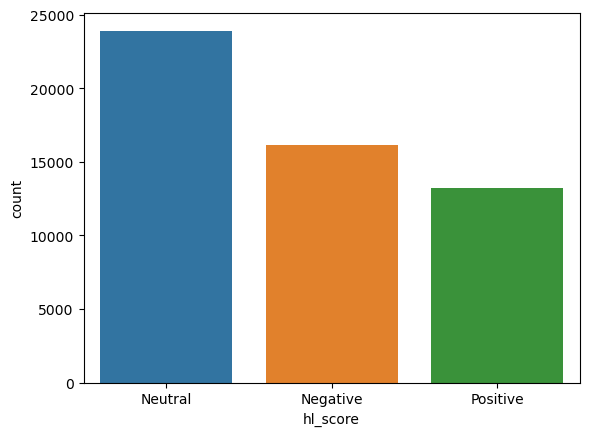

In [203]:
#perform countplot on headline score column
sns.countplot(data = all_headlines, x = "hl_score")


In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

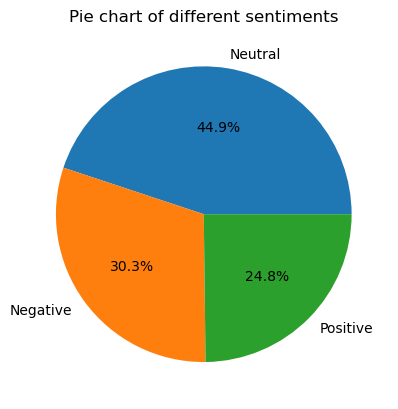

In [204]:
#perform pie digram on headline score column
plt.pie(x = all_headlines['hl_score'].value_counts(), labels=all_headlines['hl_score'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie chart of different sentiments')
plt.show()


In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [205]:
X = all_headlines['Headlines']
y = all_headlines['hl_score']

In [206]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)


LINEAR SUPPORT VECTOR MACHINE

In [207]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                ('model',LinearSVC())])


# Fit the pipeline to the data
linear_svc_model = pipe.fit(X_train, y_train)
# predict on test dataset
prediction = linear_svc_model.predict(X_test)

print("Model = Linear SVC")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model = Linear SVC
accuracy score is 97.45 %
[[1572   37   40]
 [   2 2321    3]
 [  41   13 1297]]
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
    Positive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

Wall time: 2.16 s


LOGISTIC REGRESSION

In [208]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', LogisticRegression())])

# fit the pipeline to the train data
log_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = log_model.predict(X_test)

print("Model - Logistic Regression")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model - Logistic Regression
accuracy score is 94.18 %
[[1479  118   52]
 [   3 2321    2]
 [  58   77 1216]]
              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
    Positive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

Wall time: 5.91 s


MULTINOMIAL NAIVE BAYES


In [209]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', MultinomialNB())])

# fit the pipeline to the train data
multinomialNB_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = multinomialNB_model.predict(X_test)

print("Model - Multinomial Naive Bayes")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))


Model - Multinomial Naive Bayes
accuracy score is 84.28 %
[[1367  208   74]
 [  51 2251   24]
 [ 200  280  871]]
              precision    recall  f1-score   support

    Negative       0.84      0.83      0.84      1649
     Neutral       0.82      0.97      0.89      2326
    Positive       0.90      0.64      0.75      1351

    accuracy                           0.84      5326
   macro avg       0.86      0.81      0.83      5326
weighted avg       0.85      0.84      0.84      5326

Wall time: 1.46 s


BERNOULLI NAIVE BAYES


In [210]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', BernoulliNB())])

# fit the pipeline to the train data
BernoulliNB_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = BernoulliNB_model.predict(X_test)

print("Model - Bernoulli Naive Bayes ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - Bernoulli Naive Bayes 
accuracy score is 88.96 %
[[1451   66  132]
 [ 106 2146   74]
 [ 163   47 1141]]
              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86      1649
     Neutral       0.95      0.92      0.94      2326
    Positive       0.85      0.84      0.85      1351

    accuracy                           0.89      5326
   macro avg       0.88      0.88      0.88      5326
weighted avg       0.89      0.89      0.89      5326

Wall time: 1.24 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [211]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', GradientBoostingClassifier(loss='deviance',
                                                    learning_rate=0.01,
                                                    n_estimators=10,
                                                    max_depth=5,
                                                    random_state=55))])

# fit the pipeline to the train data
GB_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = GB_model.predict(X_test)

print("Model - GRADIENT BOOSTING CLASSIFICATION ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - GRADIENT BOOSTING CLASSIFICATION 
accuracy score is 43.67 %
[[   0 1649    0]
 [   0 2326    0]
 [   0 1351    0]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
    Positive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

Wall time: 12.9 s


C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBOOST CLASSIFICATION MODEL


In [212]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

from sklearn.preprocessing import LabelEncoder
# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels in your target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', XGBClassifier())])

# fit the pipeline to the train data
XGB_model = pipe.fit(X_train,y_train_encoded)

# predict on test dataset
prediction = XGB_model.predict(X_test)

print("Model - XGBOOST CLASSIFICATION CLASSIFICATION ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test_encoded,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test_encoded,prediction))
#print classification report
print(classification_report(y_test_encoded,prediction))

Model - XGBOOST CLASSIFICATION CLASSIFICATION 
accuracy score is 90.74 %
[[1374  223   52]
 [   1 2322    3]
 [  45  169 1137]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1649
           1       0.86      1.00      0.92      2326
           2       0.95      0.84      0.89      1351

    accuracy                           0.91      5326
   macro avg       0.93      0.89      0.90      5326
weighted avg       0.92      0.91      0.91      5326

Wall time: 1min 15s


DECISION TREE CLASSIFICATION MODEL


In [213]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', DecisionTreeClassifier())])

# fit the pipeline to the train data
Decision_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = Decision_model.predict(X_test)

print("Model - Decision Tree ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - Decision Tree 
accuracy score is 95.78 %
[[1537   19   93]
 [   3 2320    3]
 [ 102    5 1244]]
              precision    recall  f1-score   support

    Negative       0.94      0.93      0.93      1649
     Neutral       0.99      1.00      0.99      2326
    Positive       0.93      0.92      0.92      1351

    accuracy                           0.96      5326
   macro avg       0.95      0.95      0.95      5326
weighted avg       0.96      0.96      0.96      5326

Wall time: 30.4 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [214]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

pipe = Pipeline([('vector', CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model', KNeighborsClassifier(n_neighbors=10,
                                                    weights='distance'))])

# fit the pipeline to the train data
KNN_model = pipe.fit(X_train,y_train)

# predict on test dataset
prediction = KNN_model.predict(X_test)

print("Model - K- NEAREST NEIGHBOUR  ")
# print accuracy score
print(f"accuracy score is {round(accuracy_score(y_test,prediction)*100,2)} %")

#print confusion matrix
print(confusion_matrix(y_test,prediction))
#print classification report
print(classification_report(y_test,prediction))

Model - K- NEAREST NEIGHBOUR  
accuracy score is 65.38 %
[[ 918  589  142]
 [ 248 1925  153]
 [ 160  552  639]]
              precision    recall  f1-score   support

    Negative       0.69      0.56      0.62      1649
     Neutral       0.63      0.83      0.71      2326
    Positive       0.68      0.47      0.56      1351

    accuracy                           0.65      5326
   macro avg       0.67      0.62      0.63      5326
weighted avg       0.66      0.65      0.64      5326

Wall time: 12.6 s


In [215]:
# helper function for comparing models matric
def compare_models(models, names, X_train, y_train,X_test, y_test):
    
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split

    # create a dataframe with column matric and metric name as value
    for(model,name) in zip(models,names):
        print(name)
        y_pred = model.predict(X_test)
    # then predict on the test set
        res = classification_report(y_test,y_pred)
        print("classification report \n", res)
        print("-------------------------------------------------------------------------------------------")

In [216]:
# list of model objects
models = [linear_svc_model, log_model, multinomialNB_model, BernoulliNB_model, GB_model, 
          Decision_model, KNN_model]
# list of model names
names = ['linearSVC','logistic','MultinomialNB','BernoulliNB','gardientboost','decisiontree','KNN']
# print the comparison of models
compare_models(models, names, X_train,y_train,X_test,y_test)

linearSVC
classification report 
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
    Positive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

-------------------------------------------------------------------------------------------
logistic
classification report 
               precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
    Positive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

-------------------------------------------------------------------------------

C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Muskan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
    Positive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

-------------------------------------------------------------------------------------------
decisiontree
classification report 
               precision    recall  f1-score   support

    Negative       0.94      0.93      0.93      1649
     Neutral       0.99      1.00      0.99      2326
    Positive       0.93      0.92      0.92      1351

    accuracy                           0.96      5326
   macro avg       0.95      0.95      0.95      5326
weighted avg       0.96      0.96      0.96      5326

-------------------------------------------------------------------------------------

# now working with test data

In [217]:
# Perforn the prediction on the test dataset
y_predicted = linear_svc_model.predict(X_test)
y_predicted

array(['Positive', 'Negative', 'Neutral', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [218]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)

In [219]:
predictions

,0
0,Positive
1,Negative
2,Neutral
3,Negative
4,Neutral
...,...
5321,Negative
5322,Negative
5323,Neutral
5324,Positive


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [220]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [221]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model.predict(sent2)
y_predict

array(['Positive'], dtype=object)

# Conclusion

We learn about NLTK, sentiment analysis in this assigment.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate
